In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Netflix Titles

In [ ]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['cast'].replace(np.nan,'No data',inplace=True)
df['director'].replace(np.nan,'No data',inplace=True)
df.dropna(inplace=True)
df['country']=df['country'].fillna(df['country'].mode()[0])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
movies = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']

## Countries with most movies / Tv shows

In [ ]:
df1 = df['country'].value_counts().head(15)
df1

United States     2809
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           85
Taiwan              81
Indonesia           79
Name: country, dtype: int64

##Analysis of Movies vs TV Shows

In [ ]:
print('Distribution of movies and tv shows on Netflix:')
print(df.type.value_counts())
print('In terms of percent:')
type_counts = df.type.value_counts()
((type_counts/len(df))*100).round(2)

Distribution of movies and tv shows on Netflix:
Movie      5687
TV Show    2274
Name: type, dtype: int64
In terms of percent:


Movie      71.44
TV Show    28.56
Name: type, dtype: float64

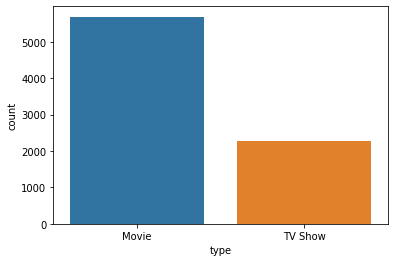

In [ ]:
sns.countplot(x="type", data=df )

Movies are produced more than TV Shows, as movies are of shorter duration than TV Shows which are of longer duration and have seasons.
And people also view Movies more than TV Shows as they can be completely watched the same day, that is also one of reasons to produce more movies.

##No of movies and TV shows released acc to release year

[Text(0, 0, '2018'),
 Text(0, 0, '2017'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020'),
 Text(0, 0, '2016'),
 Text(0, 0, '2015'),
 Text(0, 0, '2021'),
 Text(0, 0, '2014'),
 Text(0, 0, '2013'),
 Text(0, 0, '2012'),
 Text(0, 0, '2011'),
 Text(0, 0, '2010'),
 Text(0, 0, '2009'),
 Text(0, 0, '2008'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2005'),
 Text(0, 0, '2004'),
 Text(0, 0, '2003'),
 Text(0, 0, '2002')]

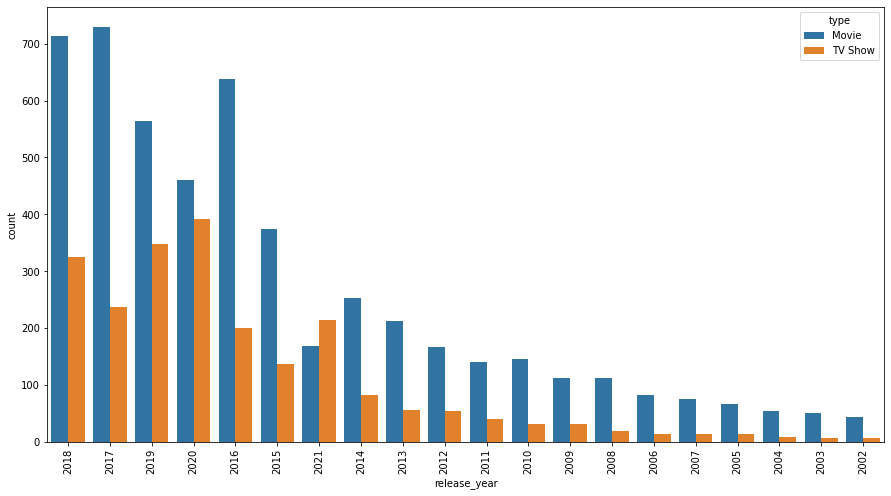

In [ ]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x="release_year", data=df, hue="type", order=df['release_year'].value_counts().index[:20])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=10)

No of movies are maximum in year 2017, they gradually reduced in 2020 due to COVID-19 as they movie production came to a halt due to COVID restrictions.
No of TV Shows are maximum in year 2020, as some shows were produced and some old would be released seeing the demand, as many people were at home and had time to watch TV Shows/series during COVID.

## Movie Rating Analysis

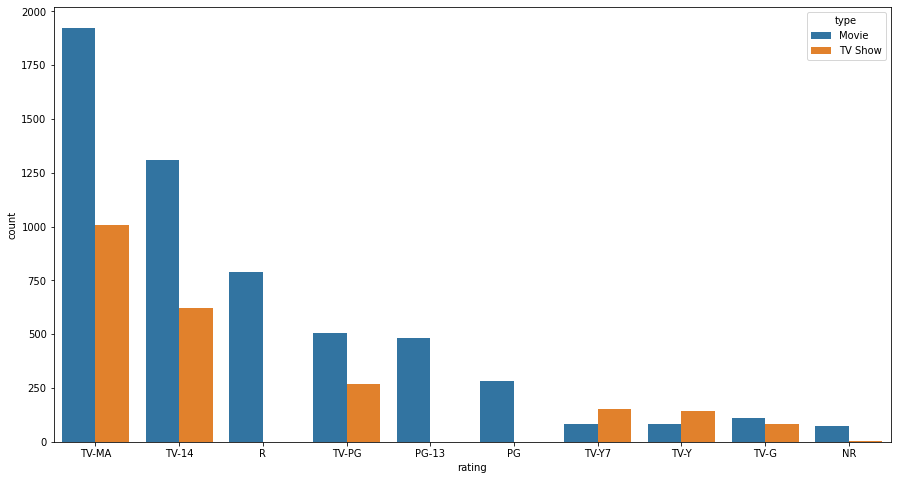

In [ ]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x="rating", data=df, hue="type", order=df['rating'].value_counts().index[0:10])

Text(0.5, 1.0, 'Countries with most movies/tv_shows on Netfix')

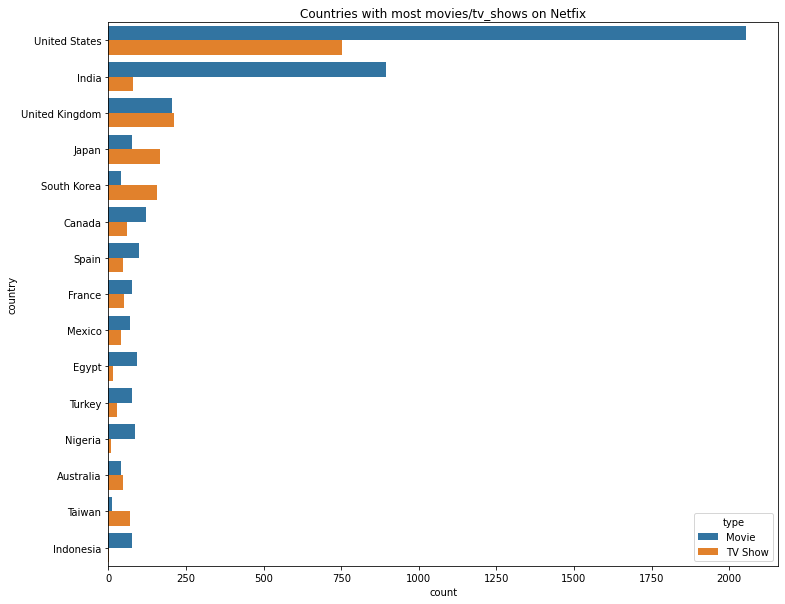

In [ ]:
plt.figure(figsize=(12,10))

ax = sns.countplot(y="country", data=df, hue="type", order=df['country'].value_counts().index[0:15])
plt.title('Countries with most movies/tv_shows on Netfix')

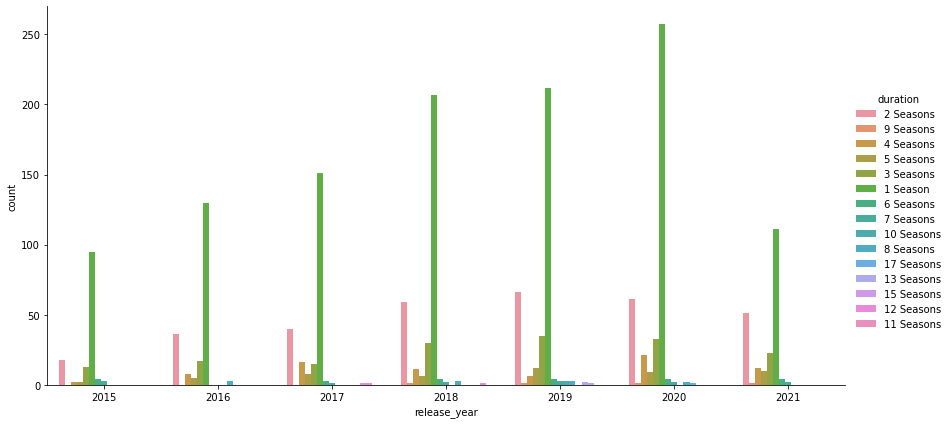

In [ ]:
g = sns.catplot(x="release_year", data=tv_show, kind="count", hue="duration",order=(2015,2016,2017,2018,2019,2020,2021),height=6,aspect=2)
g.set_xticklabels(step=1)

In [ ]:
genres=df.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
genres

title
Dick Johnson Is Dead               Documentaries
Blood & Water             International TV Shows
Blood & Water                          TV Dramas
Blood & Water                       TV Mysteries
Kota Factory              International TV Shows
                                  ...           
Zoom                    Children & Family Movies
Zoom                                    Comedies
Zubaan                                    Dramas
Zubaan                      International Movies
Zubaan                          Music & Musicals
Length: 17574, dtype: object

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

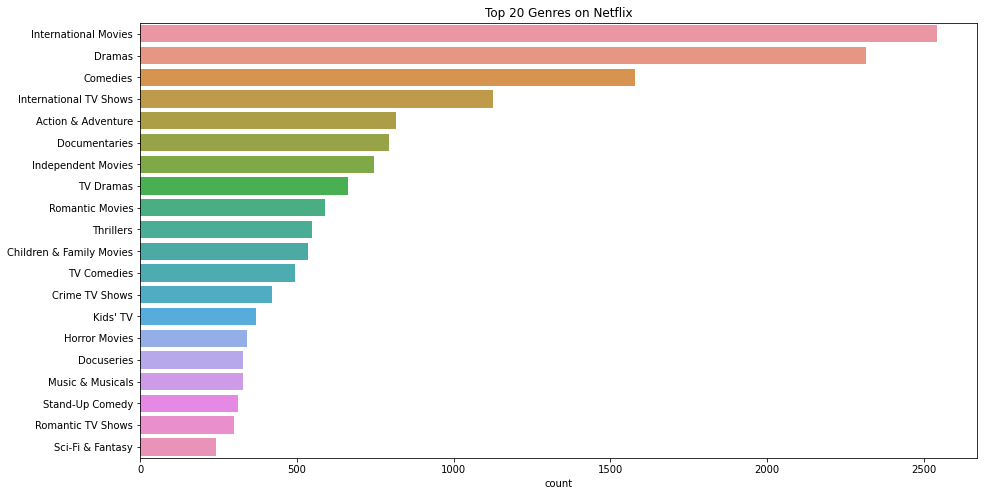

In [ ]:
plt.figure(figsize=(15,8))
gen=sns.countplot(y=genres, order=genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')

In [ ]:
n = len(pd.unique(df['director']))
# -1 to exclude 'Unknown' from the count
print(n-1, ' unique directors on Netflix')

4285  unique directors on Netflix


In [ ]:
content_per_director = pd.DataFrame(df.loc[(df['director']!='No data')].director.value_counts())
content_per_director.head(10)

,director
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,11
Don Michael Paul,10
David Dhawan,9


##Release Year vs Year Available (on Netflix)
The top gradually curves up as it is impossible to post a movie on Netflix that has not been made at that point. As Netflix continues to add more content, it appears that they also add a broader range of content in terms of age.

The reason it probably looks like there are not as many data points on the histogram as there are in the raw data is because there is a ton of overlap between the year_available and the release_year. There may very well be 2, 5, 10, etc. overlapping bubbles for any given point on the graph, especially where the year_available and release_year are close.

1     701
2     540
3     685
4     693
5     545
6     633
7     708
8     666
9     660
10    701
11    671
12    758
Name: month_available, dtype: int64


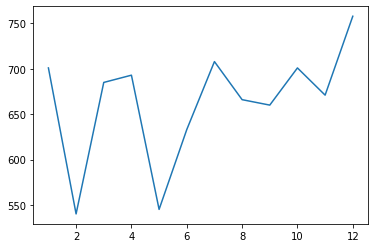

In [ ]:
df['month_available'] = pd.DatetimeIndex(df['date_added']).month
items_in_month = df.month_available.value_counts().sort_index()
print(items_in_month)
items_in_month.plot()

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      79
2016     407
2017    1121
2018    1529
2019    1858
2020    1771
2021    1140
Name: year_available, dtype: int64


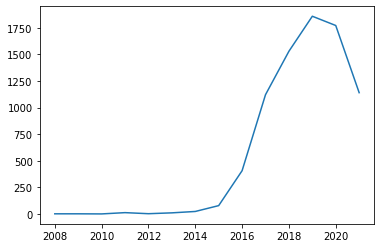

In [ ]:
df['year_available'] = pd.DatetimeIndex(df['date_added']).year
items_per_year = df.year_available.value_counts().sort_index()
print(items_per_year)
items_per_year.plot()

Text(0, 0.5, 'Year Originally Released')

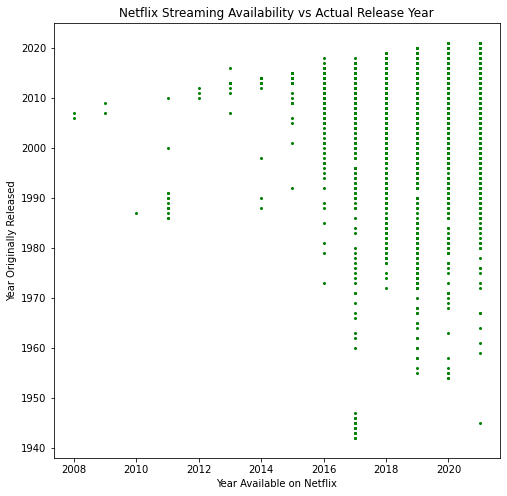

In [ ]:
df.plot(kind='scatter', x='year_available', y='release_year', figsize=(8,8), s=4, c='green')
plt.title('Netflix Streaming Availability vs Actual Release Year')
plt.xlabel('Year Available on Netflix')
plt.ylabel('Year Originally Released')

The peak of the curve falls around 100 minutes in length for a movie. The mean also falls close to that. The shortest movie length is 3 minutes, while the longest is 312 minutes!

In [ ]:
df['movie_duration_minutes'] = df['duration']

df.loc[df['type'] == 'Movie', 'movie_duration_minutes'] = df['movie_duration_minutes'].str.strip(' min')

df.loc[df['type'] == 'TV Show', 'movie_duration_minutes'] = 0

df['movie_duration_minutes'] = df['movie_duration_minutes'].astype(int)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_available,year_available,movie_duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,90
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,0
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021,125
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021,0


Text(0, 0.5, 'Number of Movies')

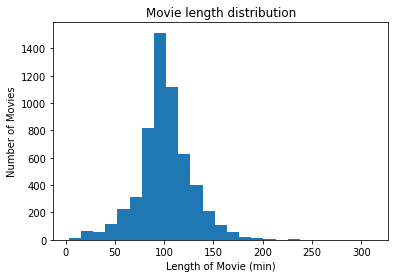

In [ ]:
movie_times = df.loc[df['type'] == 'Movie', 'movie_duration_minutes']
movie_times.plot(kind='hist', bins = 25)
plt.title('Movie length distribution')
plt.xlabel('Length of Movie (min)')
plt.ylabel('Number of Movies')

In [ ]:
movie_times.describe().round(2)

count    5687.00
mean      100.52
std        27.12
min         3.00
25%        88.00
50%        99.00
75%       115.00
max       312.00
Name: movie_duration_minutes, dtype: float64

In [ ]:
df['season_count'] = df['duration']

df.loc[df['type'] == 'TV Show', 'season_count'] = df['season_count'].str.strip(' Seasons')
df.loc[df['type'] == 'TV Show', 'season_count'] = df['season_count'].str.strip(' Season')

df.loc[df['type'] == 'Movie', 'season_count'] = 0

df['season_count'] = df['season_count'].astype(int)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_available,year_available,movie_duration_minutes,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,90,0
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,0,2
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,0,2
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021,125,0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021,0,9


1     1456
2      383
3      187
4       92
5       63
6       33
7       22
8       16
9        8
10       6
11       1
12       2
13       2
15       2
17       1
Name: season_count, dtype: int64


Text(0, 0.5, 'Count of Shows')

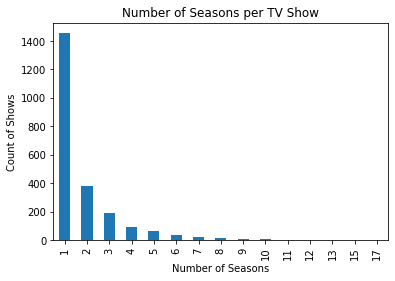

In [ ]:
tv_seasons = df.loc[df['type'] == 'TV Show', 'season_count'].value_counts().sort_index()
print(tv_seasons)
tv_seasons.plot(kind='bar')
plt.title('Number of Seasons per TV Show')
plt.xlabel('Number of Seasons')
plt.ylabel('Count of Shows')

In [ ]:
from collections import Counter

genres=list(movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

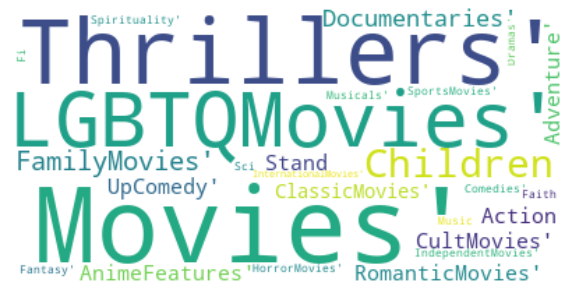

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (10,10)

#assigning shape to the word cloud

wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Netflix Shows


In [ ]:
df1 = pd.read_csv("Netflix_Shows.csv", encoding='latin-1')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [ ]:
#removing all incomplete data
df1['ratingLevel'].replace(np.nan,'No data',inplace=True)
df1.dropna(inplace=True)
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              605 non-null    object 
 1   rating             605 non-null    object 
 2   ratingLevel        605 non-null    object 
 3   ratingDescription  605 non-null    int64  
 4   release year       605 non-null    int64  
 5   user rating score  605 non-null    float64
 6   user rating size   605 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 37.8+ KB


,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80


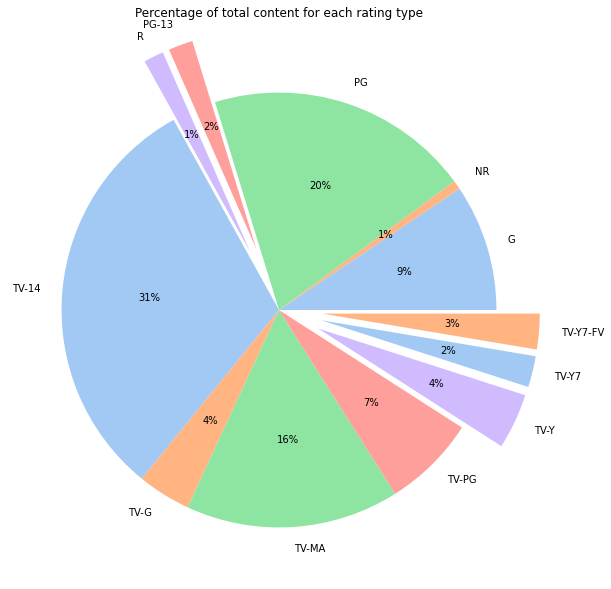

In [ ]:
a = list(df1["rating"].value_counts().sort_index())
b = sorted(list(df1["rating"].unique()))
colors = sns.color_palette('pastel')[0:5]
explode = [0, 0, 0, 0.3, 0.3, 0, 0, 0, 0, 0.2, 0.2, 0.2]
plt.pie(a, labels = b, colors = colors, autopct='%.0f%%', explode=explode)
plt.title("Percentage of total content for each rating type\n")
plt.show()


The above plot shows that majority of the content available is "TV-14" followed by "PG" and then "TV-MA". This could indicate than the viewer base is mainly younger people or teenagers.

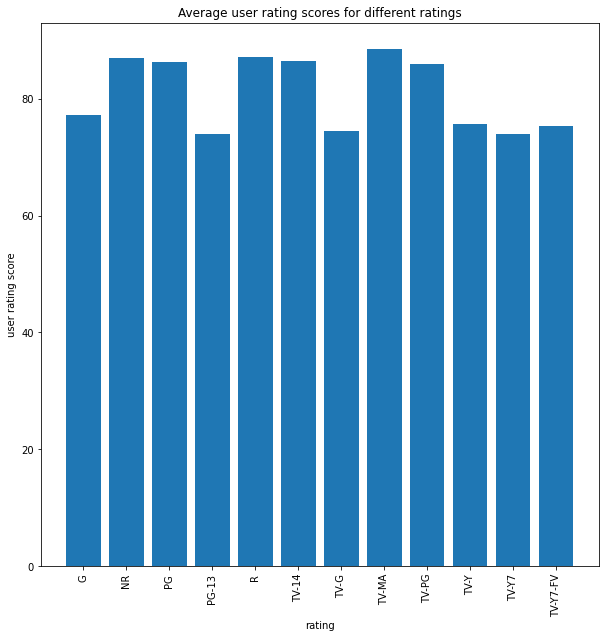

          ratingDescription  release year  user rating score  user rating size
rating                                                                        
G                      35.0   1997.789474          77.245614              80.0
NR                    124.0   2015.250000          87.000000              80.0
PG                     60.0   2005.537815          86.201681              80.0
PG-13                  80.0   2005.000000          74.000000              80.0
R                     100.0   2013.777778          87.111111              80.0
TV-14                  90.0   2013.994681          86.425532              80.0
TV-G                   35.0   2011.208333          74.500000              80.0
TV-MA                 110.0   2016.197917          88.520833              80.0
TV-PG                  70.0   2013.976190          85.857143              80.0
TV-Y                   10.0   2008.080000          75.600000              80.0
TV-Y7                  41.0   2000.785714          7

In [ ]:
dfmeans = df1.groupby("rating").mean()
plt.bar(b, dfmeans["user rating score"])
plt.xticks(rotation=90)
plt.xlabel("rating")
plt.ylabel("user rating score")
plt.title("Average user rating scores for different ratings")
plt.show()
print(dfmeans)


The average User rating score for different rating types is nearly the same, with the highest being 88.52 for TV-MA and lowest being 73.93 for TV-Y7. This shows that even though the amount of content for each rating may be vary greatly, it is all still liked equally.

The average user rating size for all the ratings is same: 80. This could indicate that the number of viewers for all the rating types are nearly the same as the number of people who scored the content are the same.

Text(0.5, 1.0, 'user rating scores by release year')

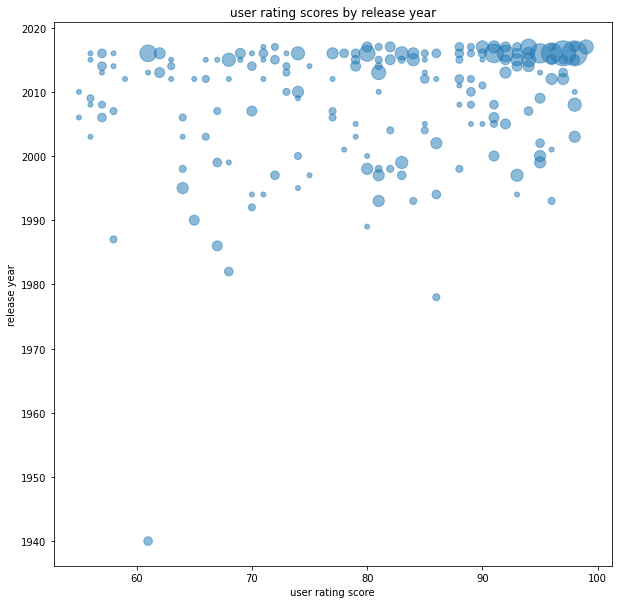

In [ ]:
index = df1.groupby(['user rating score', 'release year']).size().index
x = index.map(lambda t: t[0])
y = index.map(lambda t: t[1])
areas = df1.groupby(['user rating score', 'release year']).size()
plt.scatter(x, y, s=areas * 25, alpha=0.5)
plt.xlabel("user rating score")
plt.ylabel("release year")
plt.title("user rating scores by release year")

The size of the bubbles and their density is mush higher in the top right corner indicating that of the content available, the ones which were released in and just before 2020 have a greater success rate as they have a larger density for a higher user rating score.

# Amazon Prime


In [ ]:
df2 = pd.read_csv("prime.csv", encoding='latin-1')  #problem faced while importing data, encoding='latin-1' was solution found on net
df2.dropna(inplace=True)
df2.head(3)


,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,"Sci-fi, Comedy",8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+


##No of seasons count

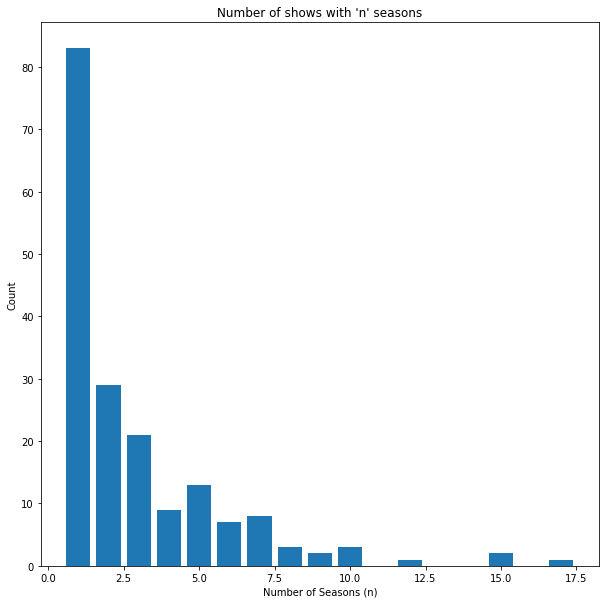

In [ ]:
a = list(df2["No of seasons available"].value_counts().sort_index())
b = sorted(list(df2["No of seasons available"].unique()))
plt.bar(b,a)
plt.xlabel("Number of Seasons (n)")
plt.ylabel("Count")
plt.title("Number of shows with 'n' seasons")
plt.show()

Majority of the shows have only 1 season available, the general trend is that with greater number of seasons, the count reduces. This is because it is very difficult for a show to remain successful for so long and usually many shows get cancelled after the first season not being very successful, hence majority with only 1 season.

##Correlation between number of seasons and rating

                              S.no.  Year of release  IMDb rating
No of seasons available                                          
1.0                      214.638554      2017.036145     7.008434
2.0                      146.172414      2015.689655     7.310345
3.0                      154.761905      2012.571429     7.833333
4.0                      207.777778      2013.444444     7.733333
5.0                      154.076923      2008.692308     7.484615
6.0                      189.000000      2004.714286     7.814286
7.0                      151.125000      2008.500000     7.912500
8.0                       35.666667      2009.000000     8.266667
9.0                      281.000000      2000.000000     8.150000
10.0                      89.333333      2011.000000     7.833333
12.0                     268.000000      2003.000000     7.000000
15.0                      35.500000      2005.500000     8.000000
17.0                      80.000000      2004.000000     7.800000


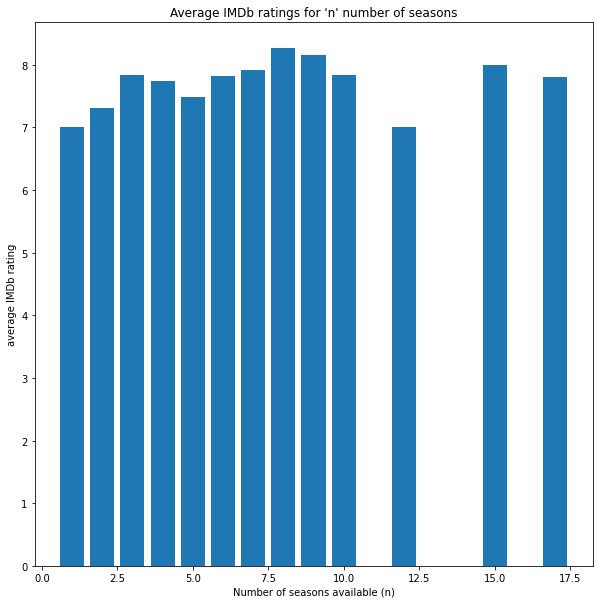

In [ ]:
dfmeans1 = df2.groupby("No of seasons available").mean()
plt.bar(b, dfmeans1["IMDb rating"])
plt.xlabel("Number of seasons available (n)")
plt.ylabel("average IMDb rating")
plt.title("Average IMDb ratings for 'n' number of seasons")
print(dfmeans1)
plt.show()

The average IMDb rating for shows with equal number of seasons is nearly the same for all with highest being 8.27 for shows with 8 seasons and lowest being 7.00 for shows with 12 seasons.
The averages being so close indicate that eventhough the number of shows greatly differs accross different number of seasons, viewers enjoy all the content equally regardless of the length of the show.

##Language count

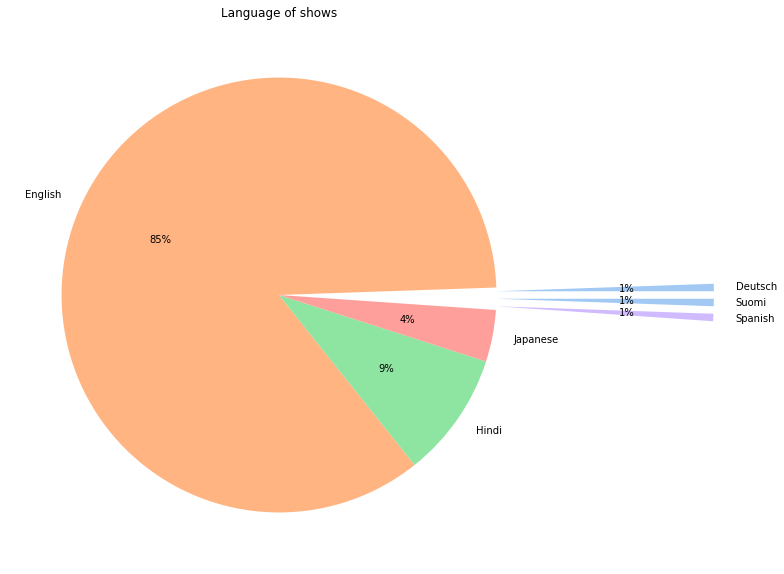

In [ ]:
c = list(df2["Language"].value_counts().sort_index())
d = sorted(list(df2["Language"].unique()))
colors = sns.color_palette('pastel')[0:5]
explode = [1, 0, 0, 0, 1, 1]
plt.pie(c, labels = d, colors = colors, autopct='%.0f%%', explode=explode)
plt.title("Language of shows")
plt.show()

Majority of the shows are in English, this is expected as tv series industry is the biggest in hollywood. In the recent years Hindi TV series have started becoming more successful and hence the language with second highest number of shows is Hindi. Japanese shows and animes are also starting to get more recognition in India and hence about 4 percent of the shows are Japanese. With subtitles and audio dubbing Language is becoming less of a barrier and hence shows of Spanish, Deutsch and Souml are also available.

##Age of viewers count

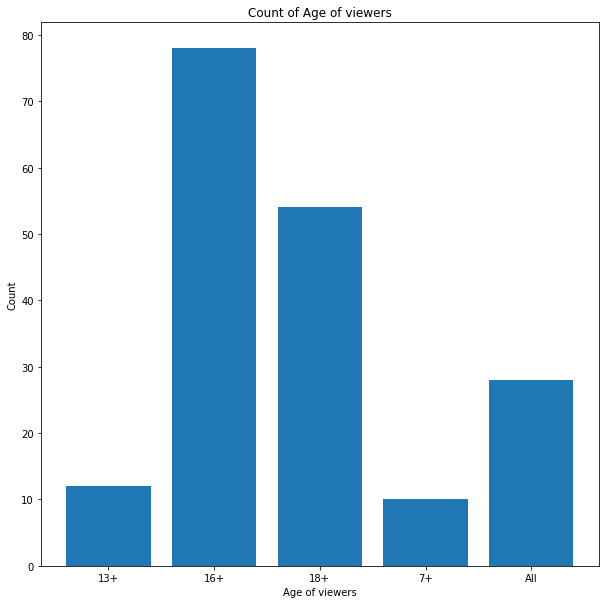

In [ ]:
e = list(df2["Age of viewers"].value_counts().sort_index())
f = sorted(list(df2["Age of viewers"].unique()))

plt.bar(f,e)
plt.xlabel("Age of viewers")
plt.ylabel("Count")
plt.title("Count of Age of viewers")
plt.show()

Most popular age group in shows is 16+ and then 18+. This shows that the viewers prefer mature content that is meant for young adults. The reason for this could be that the younger generation (ages 16-28) use OTT platforms a lot more than kids and people above 30 years of age.

##rating by viewer age

                     S.no.  ...  IMDb rating
Age of viewers              ...             
13+             269.666667  ...     7.050000
16+             152.435897  ...     7.353846
18+             139.462963  ...     7.579630
7+              256.500000  ...     7.330000
All             280.107143  ...     7.060714

[5 rows x 4 columns]


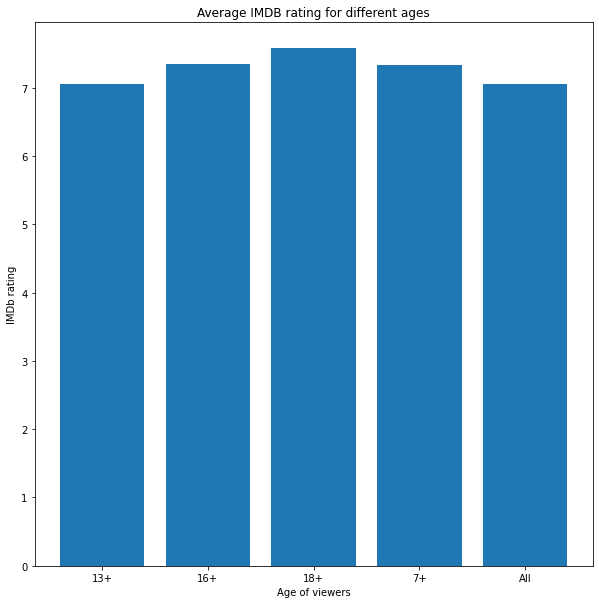

In [ ]:
dfmeans2 = df2.groupby("Age of viewers").mean()
plt.bar(f, dfmeans2["IMDb rating"])
print(dfmeans2)
plt.xlabel("Age of viewers")
plt.ylabel("IMDb rating")
plt.title("Average IMDB rating for different ages")
plt.show()

Even though the number of shows for different ages varied greatly, the IMDb rating is nearly the same for all, with 18+ being the highest at 7.58 and 13+ being the lowest at 7.05. This shows that all the available content is equally liked by the viewers irrespective of the age of viewers.

##Number of Genres

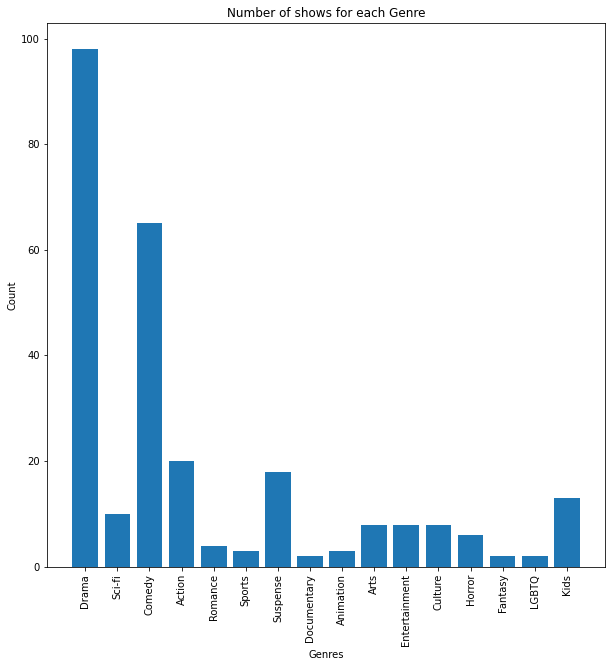

In [ ]:
genres = list(df2["Genre"])
genrelist = []

for genre in genres:
  genrelist.append(genre.replace(" ","").split(","))

allgen = {}

for gl in genrelist:
  for genre in gl:
    if genre not in allgen:
      allgen[genre] = 0
    allgen[genre] += 1

plt.bar(*zip(*allgen.items()))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Number of shows for each Genre")
plt.show()

Majority of the shows are of genre Drama followed by Comedy. All the other genres are niche and often paired with drama and other genres hence the number of Drama shows is so much higher than the others. It is cear that Comedy and Drama is greatly liked whereas genres like documentary and Fantasy are much less in number and hence probably not as prefered by viewers.

# Movies on Netflix ,Hulu ,Prime video ,disney+

In [ ]:
#Read the csv file
df3=pd.read_csv("MoviesOnStreamingPlatforms_updated.csv", encoding ='latin-1')
#Examine the data
df3

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,NaN,14/100,0,0,0,1,0,NaN,"Crime,Reality-TV",United States,"Greek,English",NaN
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,NaN,13/100,0,0,0,1,0,Chris Anthony Hamilton,Animation,United States,English,23.0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,NaN,13/100,0,0,0,1,0,NaN,NaN,United States,NaN,NaN
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,NaN,10/100,0,0,0,1,0,Dan Oliver,"Drama,History",NaN,NaN,NaN


##Change in Popularity of Genres over time

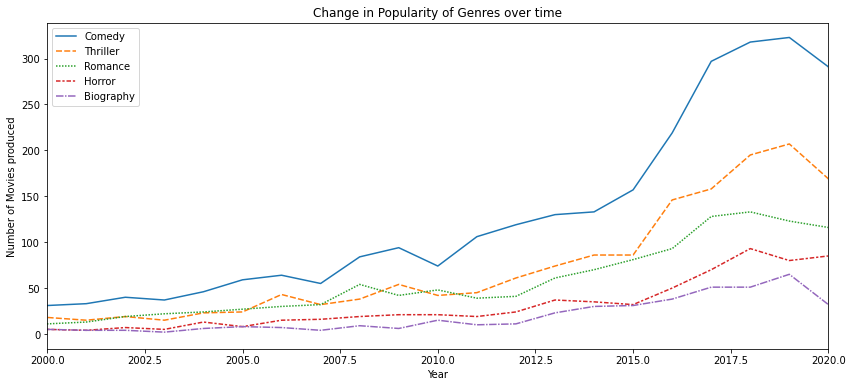

In [ ]:
#setting new index for the data frame as year and sorting in ascending order
dfn=df3.set_index('Year').sort_index()
#filling empty entries in Genres column with Unknown string
y=dfn.Genres.fillna('Unknown')

#function that will return true if string contains Comedy as a substring and false otherwise
def boolfunc(p):
  if 'Comedy' in p.split(','): #splitting string into list of substring with ,
    return True
  else:
    return False

#z_comedy is series with true , false as entries and year as index of comedy genre
z_comedy=y.map(lambda p: boolfunc(p))
#final_comedy is series containg the sum of values grouped by year
final_comedy=z_comedy.groupby('Year').sum().rename('Comedy')


def boolfunt(p):
  if 'Thriller' in p.split(','):
    return True
  else:
    return False

z_thriller=y.map(lambda p: boolfunt(p))
final_thriller=z_thriller.groupby('Year').sum().rename('Thriller')

def boolfunr(p):
  if 'Romance' in p.split(','):
    return True
  else:
    return False

z_romance=y.map(lambda p: boolfunr(p))
final_romance=z_romance.groupby('Year').sum().rename('Romance')

def boolfunh(p):
  if 'Horror' in p.split(','):
    return True
  else:
    return False

z_horror=y.map(lambda p: boolfunh(p))
final_horror=z_horror.groupby('Year').sum().rename('Horror')

def boolfunb(p):
  if 'Biography' in p.split(','):
    return True
  else:
    return False

z_biography=y.map(lambda p: boolfunb(p))
final_biography=z_biography.groupby('Year').sum().rename('Biography')


#combining all series into a data frame, taken from internet
final_Dataframe=pd.concat([final_comedy,final_thriller,final_romance,final_horror,final_biography], axis=1)
plt.figure(figsize=(14,6))
plt.xlim(2000,2020)
plt.ylabel("Number of Movies produced")
plt.title('Change in Popularity of Genres over time')
sns.lineplot(data=final_Dataframe)

INTERFERENCE :

1] from year 2000 to 2015 :

1a] Comedy Movies were most produced , then thriller  and romance(equally popular),  horror and biography are equally least popular among these 5 Genres

2]in recent year[2015-20] :

2a] slope of comdey curve is highest hence its popularity is increasing much faster then any other genre and biography has least slope which means its popularity has not changed very much

2b] thriller has become more popular than romance in recent years

2c]horror has become more popular than  biograpgy in recent years


##  Difference between Quality of below18 vs above18 movies

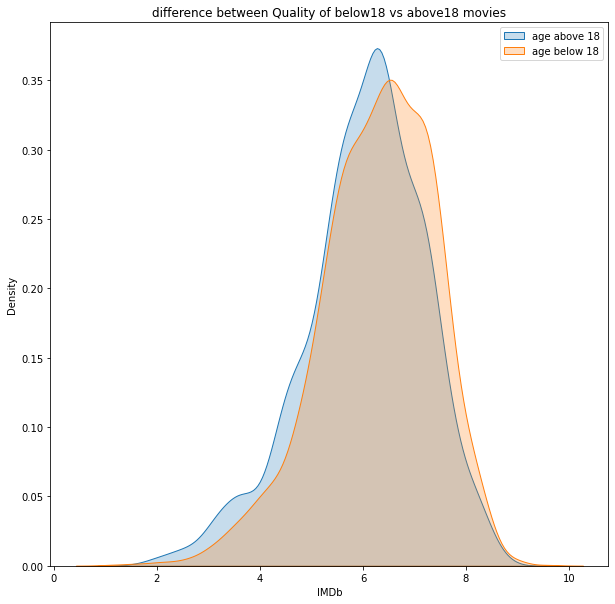

In [ ]:
df_a18=df3.loc[df3.Age=='18+']#dataframe having only rows for which minimum age required is 18
df_b18=df3.loc[(df3.Age!='18+') &( df3.Age.notnull())]#dataframe  excluding rows that have min. age 18 and null values

#function convert type string rate into type float rate
def rate(p):
  return float(p.split('/')[0]) #break into substring by / and take the substring at index 0 , convert string into float

a18rate=df_a18.IMDb.loc[df3.IMDb.notnull()].map(lambda p : rate(p))  # series containing float IMDb ratings of above 18 dataframe
b18rate=df_b18.IMDb.loc[df3.IMDb.notnull()].map(lambda p : rate(p))

plt.title('difference between Quality of below18 vs above18 movies')
sns.kdeplot(data=a18rate, shade=True,label="age above 18")
sns.kdeplot(data=b18rate, shade=True, label="age below 18")
plt.legend()

INTERFERENCE : density function of both plots is nearly same hence Quality (measured by rate distribution) for above 18 and below 18 age movies is nearly same.



## Relation between IMDB rating vs rotten tomatoes rating on different platform and comparing Quality of movies on different platforms

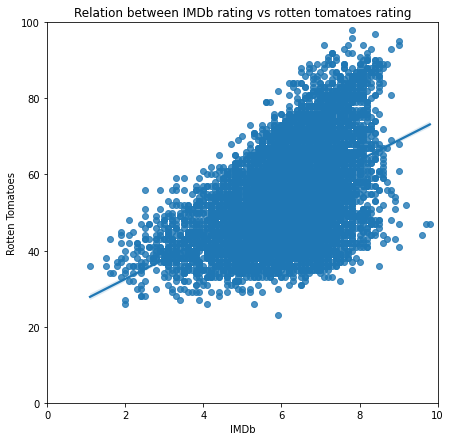

In [ ]:
#df_imdb is series containing float  IMDb ratings  #removing rows that have null values in ratings
df_imdb=df3.IMDb.loc[(df3.IMDb.notnull())&(df3['Rotten Tomatoes'].notnull())].map(lambda p : rate(p))
df_rt=df3['Rotten Tomatoes'].loc[(df3.IMDb.notnull())&(df3['Rotten Tomatoes'].notnull())].map(lambda p : rate(p))


plt.figure(figsize=(7,7))
plt.ylim(0,100)
plt.xlim(0,10)
plt.title('Relation between IMDb rating vs rotten tomatoes rating')
sns.regplot(x=df_imdb,y=df_rt,)


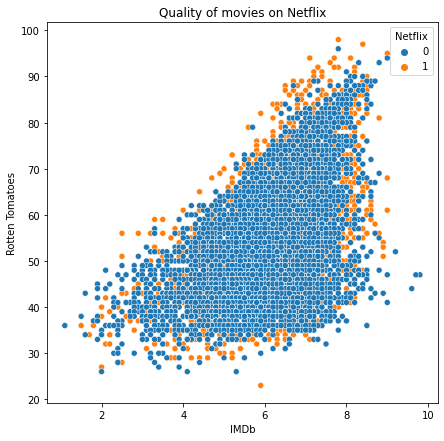

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Quality of movies on Netflix')
sns.scatterplot(x=df_imdb,y=df_rt,hue=df3.loc[(df3.IMDb.notnull())&(df3['Rotten Tomatoes'].notnull())]['Netflix'])

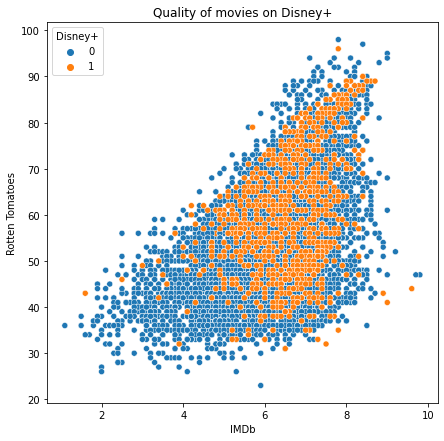

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Quality of movies on Disney+')
sns.scatterplot(x=df_imdb,y=df_rt,hue=df3.loc[(df3.IMDb.notnull())&(df3['Rotten Tomatoes'].notnull())]['Disney+'])

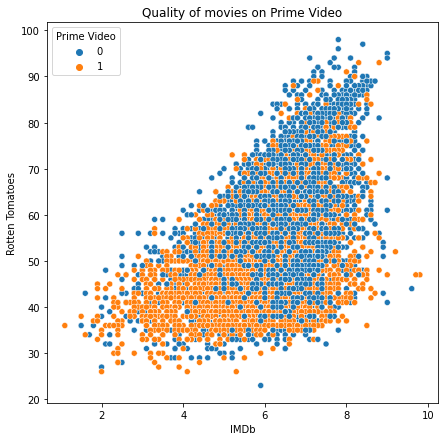

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Quality of movies on Prime Video')
sns.scatterplot(x=df_imdb,y=df_rt,hue=df3.loc[(df3.IMDb.notnull())&(df3['Rotten Tomatoes'].notnull())]['Prime Video'])

INTERFERENCE :

1]By regression plot betwewen IMDb ratings and Rotten Tomatoes ratings we came to know -

1a]for low quality movies ( which have low ratings on both type of ratings)
Rotten Tomatoes give comparatively higher ratings than IMDb.

1b]for high quality movies ( which have high ratings on both type of ratings)
Rotten Tomatoes give comparatively less ratings than IMDb.


2]By using scatter plot for different platform we came to know-

2a]Netflix : the points lie on the boundary of scatter plot hence, we realise that movies on Netflix has big differences in ratings given by IMDb and rotten toomatoes which is an unusual discovery ,also we can see both high and low quality movies are available on this platform in almost equal proportion,

2b]Disney+ : the points are fairly distributed inside the upper half of scatter plot which shows that movies on Disney+ follow our relation between ratings which we find in regression plot. since almost all movies on Disney+ have IMDb rating greater than 5 we can say that this platform has most of the movies between moderate to high quality

2c]Prime Video: the points are fairly distributed inside the lower half of scatter plot which shows that movies on Prime Video follow our relation between ratings which we find in regression plot. since most movies on Prime Video have IMDb rating less than 5, we can say that this platform has comparatively higher low quality movies than netflix and  Disney+
